In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import numpy as np

In [2]:
ensgid = pd.read_csv('/home/jiageng/Documents/fhr/annotations/ensgid-autosomal-proteincoding.txt', sep='\t', skiprows=1, names=['gid','gname','Chromosome','Start','End'])

In [3]:
ensgid_index = ensgid.set_index(['gid','gname']).index

In [5]:
dfexp = pd.read_csv('/home/jiageng/Documents/fhr/data/Expression Estimates - Gene Based_MMRF_CoMMpass_IA22_salmon_geneUnstrandedIgFiltered_tpm.tsv.gz',sep='\t')


In [6]:
samples = dfexp.columns[1:]

In [7]:
public_id = dfexp.columns.str.extract(r'(MMRF_\d{4})')[1:]

In [8]:
first_samples = pd.DataFrame(zip(public_id.values[:,0],samples.values),columns=['PUBLIC_ID','SAMPLE']).groupby(['PUBLIC_ID']).head(1)
first_samples

,PUBLIC_ID,SAMPLE
0,MMRF_1021,MMRF_1021_1_BM_CD138pos
1,MMRF_1024,MMRF_1024_1_BM_CD138pos
4,MMRF_1029,MMRF_1029_1_BM_CD138pos
5,MMRF_1030,MMRF_1030_1_BM_CD138pos
9,MMRF_1031,MMRF_1031_1_BM_CD138pos
...,...,...
928,MMRF_2939,MMRF_2939_1_BM_CD138pos
929,MMRF_2940,MMRF_2940_1_BM_CD138pos
930,MMRF_2941,MMRF_2941_1_BM_CD138pos
931,MMRF_2946,MMRF_2946_1_BM_CD138pos


Subset to protein coding genes & first samples

In [9]:
dfexp.head()

,Gene,MMRF_1021_1_BM_CD138pos,MMRF_1024_1_BM_CD138pos,MMRF_1024_3_BM_CD138pos,MMRF_1024_2_BM_CD138pos,MMRF_1029_1_BM_CD138pos,MMRF_1030_1_BM_CD138pos,MMRF_1030_3_BM_CD138pos,MMRF_1030_4_BM_CD138pos,MMRF_1030_5_BM_CD138pos,MMRF_1031_1_BM_CD138pos,MMRF_1032_1_BM_CD138pos,MMRF_1033_1_BM_CD138pos,MMRF_1037_1_BM_CD138pos,MMRF_1038_1_BM_CD138pos,MMRF_1048_1_BM_CD138pos,MMRF_1049_2_BM_CD138pos,MMRF_1049_4_BM_CD138pos,MMRF_1056_6_BM_CD138pos,MMRF_1061_3_BM_CD138pos,MMRF_1068_1_BM_CD138pos,MMRF_1072_2_BM_CD138pos,MMRF_1073_1_BM_CD138pos,MMRF_1077_1_BM_CD138pos,MMRF_1079_1_BM_CD138pos,...,MMRF_2830_1_BM_CD138pos,MMRF_2831_1_BM_CD138pos,MMRF_2832_1_BM_CD138pos,MMRF_2834_1_BM_CD138pos,MMRF_2836_1_BM_CD138pos,MMRF_2843_1_BM_CD138pos,MMRF_2847_1_BM_CD138pos,MMRF_2848_1_BM_CD138pos,MMRF_2851_1_BM_CD138pos,MMRF_2853_1_BM_CD138pos,MMRF_2903_1_BM_CD138pos,MMRF_2905_1_BM_CD138pos,MMRF_2908_1_BM_CD138pos,MMRF_2914_1_BM_CD138pos,MMRF_2921_1_BM_CD138pos,MMRF_2921_2_BM_CD138pos,MMRF_2924_1_BM_CD138pos,MMRF_2926_1_BM_CD138pos,MMRF_2936_1_PB_CD138pos,MMRF_2938_1_BM_CD138pos,MMRF_2939_1_BM_CD138pos,MMRF_2940_1_BM_CD138pos,MMRF_2941_1_BM_CD138pos,MMRF_2946_1_BM_CD138pos,MMRF_2947_1_BM_CD138pos
0,ENSG00000000003,24.06020,9.26375,9.05981,8.96080,16.97330,0.969095,0.12039,0.886352,0.178138,0.035827,0.886566,0.308465,0.300618,3.60547,0.696653,0.536551,0.149197,0.00000,5.73625,0.00000,6.711740,1.82973,0.00000,37.7367,...,0.026991,2.317360,0.026157,1.976530,0.082349,0.007130,0.924425,1.20741,0.160392,0.064672,0.930063,4.35205,0.020671,5.32498,1.02019,1.67013,0.958704,0.26882,1.16341,11.19540,0.047418,0.521136,0.004138,8.33004,0.06917
1,ENSG00000000005,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.123776,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.029742,0.00000,0.00000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.01170,0.000000,0.00000,0.00000,0.00000,0.000000,0.026069,0.000000,0.00000,0.00000
2,ENSG00000000419,64.03230,29.61760,32.86070,31.75310,55.99980,49.706400,67.76900,55.553600,107.119000,63.852600,54.427500,41.739900,42.137200,45.26950,52.101100,41.489700,39.511600,22.81380,63.11290,52.07500,49.773000,36.81930,34.97860,42.7704,...,63.898800,85.308600,53.306800,110.703000,103.533000,52.465600,49.399300,47.30290,86.223300,32.579500,44.151300,45.41710,68.523000,63.33530,62.63770,65.57670,49.050100,42.31390,92.23890,53.12470,77.719700,47.628200,74.162400,45.30920,39.79090
3,ENSG00000000457,10.88410,5.98851,11.74290,11.05970,10.07510,6.215370,10.54790,9.580530,8.006200,7.548400,4.994330,8.541440,5.795510,5.30958,5.039870,4.408630,7.294610,8.32356,4.49110,7.08944,9.098470,5.84183,9.78189,14.4378,...,3.033810,1.822210,3.138610,1.977210,1.853590,1.830760,3.053530,5.17523,4.952210,7.543360,6.585270,7.28089,13.476900,10.51580,8.83138,6.90505,4.107660,4.20888,8.48890,7.06580,14.426500,1.829760,2.200490,6.35487,7.30977
4,ENSG00000000460,7.18014,1.25799,3.86253,3.23004,3.50257,1.463370,8.42612,11.433800,8.089420,6.333290,2.864740,1.372150,2.174200,1.40812,3.819070,1.359100,2.697690,24.57920,2.60187,1.60197,3.663730,1.29681,2.03458,11.1350,...,0.528645,0.429433,0.548527,0.445058,1.008050,0.751723,0.420337,1.13987,1.102670,0.440124,2.229720,3.65028,11.578500,7.13765,3.67732,3.43907,3.164980,1.34231,6.12988,3.85026,16.561000,0.990250,1.076120,5.90676,2.77125


In [10]:
'Gene|' + '|'.join(first_samples.SAMPLE)

'Gene|MMRF_1021_1_BM_CD138pos|MMRF_1024_1_BM_CD138pos|MMRF_1029_1_BM_CD138pos|MMRF_1030_1_BM_CD138pos|MMRF_1031_1_BM_CD138pos|MMRF_1032_1_BM_CD138pos|MMRF_1033_1_BM_CD138pos|MMRF_1037_1_BM_CD138pos|MMRF_1038_1_BM_CD138pos|MMRF_1048_1_BM_CD138pos|MMRF_1049_2_BM_CD138pos|MMRF_1056_6_BM_CD138pos|MMRF_1061_3_BM_CD138pos|MMRF_1068_1_BM_CD138pos|MMRF_1072_2_BM_CD138pos|MMRF_1073_1_BM_CD138pos|MMRF_1077_1_BM_CD138pos|MMRF_1079_1_BM_CD138pos|MMRF_1080_1_BM_CD138pos|MMRF_1082_1_BM_CD138pos|MMRF_1085_3_BM_CD138pos|MMRF_1089_1_BM_CD138pos|MMRF_1092_1_BM_CD138pos|MMRF_1098_1_BM_CD138pos|MMRF_1099_1_BM_CD138pos|MMRF_1100_1_BM_CD138pos|MMRF_1101_2_BM_CD138pos|MMRF_1107_1_BM_CD138pos|MMRF_1108_1_BM_CD138pos|MMRF_1110_2_BM_CD138pos|MMRF_1112_3_BM_CD138pos|MMRF_1128_1_BM_CD138pos|MMRF_1129_1_BM_CD138pos|MMRF_1130_1_BM_CD138pos|MMRF_1131_2_BM_CD138pos|MMRF_1137_4_BM_CD138pos|MMRF_1148_1_BM_CD138pos|MMRF_1151_1_BM_CD138pos|MMRF_1152_1_BM_CD138pos|MMRF_1153_1_BM_CD138pos|MMRF_1157_2_BM_CD138pos|MMRF_1159_

In [11]:
dfexp.filter(regex = 'Gene|' + '|'.join(first_samples.SAMPLE))

,Gene,MMRF_1021_1_BM_CD138pos,MMRF_1024_1_BM_CD138pos,MMRF_1029_1_BM_CD138pos,MMRF_1030_1_BM_CD138pos,MMRF_1031_1_BM_CD138pos,MMRF_1032_1_BM_CD138pos,MMRF_1033_1_BM_CD138pos,MMRF_1037_1_BM_CD138pos,MMRF_1038_1_BM_CD138pos,MMRF_1048_1_BM_CD138pos,MMRF_1049_2_BM_CD138pos,MMRF_1056_6_BM_CD138pos,MMRF_1061_3_BM_CD138pos,MMRF_1068_1_BM_CD138pos,MMRF_1072_2_BM_CD138pos,MMRF_1073_1_BM_CD138pos,MMRF_1077_1_BM_CD138pos,MMRF_1079_1_BM_CD138pos,MMRF_1080_1_BM_CD138pos,MMRF_1082_1_BM_CD138pos,MMRF_1085_3_BM_CD138pos,MMRF_1089_1_BM_CD138pos,MMRF_1092_1_BM_CD138pos,MMRF_1098_1_BM_CD138pos,...,MMRF_2829_1_BM_CD138pos,MMRF_2830_1_BM_CD138pos,MMRF_2831_1_BM_CD138pos,MMRF_2832_1_BM_CD138pos,MMRF_2834_1_BM_CD138pos,MMRF_2836_1_BM_CD138pos,MMRF_2843_1_BM_CD138pos,MMRF_2847_1_BM_CD138pos,MMRF_2848_1_BM_CD138pos,MMRF_2851_1_BM_CD138pos,MMRF_2853_1_BM_CD138pos,MMRF_2903_1_BM_CD138pos,MMRF_2905_1_BM_CD138pos,MMRF_2908_1_BM_CD138pos,MMRF_2914_1_BM_CD138pos,MMRF_2921_1_BM_CD138pos,MMRF_2924_1_BM_CD138pos,MMRF_2926_1_BM_CD138pos,MMRF_2936_1_PB_CD138pos,MMRF_2938_1_BM_CD138pos,MMRF_2939_1_BM_CD138pos,MMRF_2940_1_BM_CD138pos,MMRF_2941_1_BM_CD138pos,MMRF_2946_1_BM_CD138pos,MMRF_2947_1_BM_CD138pos
0,ENSG00000000003,24.060200,9.263750,16.973300,0.969095,0.035827,0.886566,0.308465,0.300618,3.605470,0.696653,0.536551,0.000000,5.736250,0.000000,6.711740,1.829730,0.000000,37.7367,3.015620,0.000000,0.427976,0.576406,1.844230,4.250930,...,4.08283,0.026991,2.317360,0.026157,1.976530,0.082349,0.007130,0.924425,1.20741,0.160392,0.064672,0.930063,4.352050,0.020671,5.324980,1.020190,0.958704,0.268820,1.163410,11.195400,0.047418,0.521136,0.004138,8.330040,0.069170
1,ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029742,0.000000,0.000000,0.0000,0.045780,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026069,0.000000,0.000000,0.000000
2,ENSG00000000419,64.032300,29.617600,55.999800,49.706400,63.852600,54.427500,41.739900,42.137200,45.269500,52.101100,41.489700,22.813800,63.112900,52.075000,49.773000,36.819300,34.978600,42.7704,36.111000,116.621000,67.199300,69.108300,38.739400,87.655800,...,67.25650,63.898800,85.308600,53.306800,110.703000,103.533000,52.465600,49.399300,47.30290,86.223300,32.579500,44.151300,45.417100,68.523000,63.335300,62.637700,49.050100,42.313900,92.238900,53.124700,77.719700,47.628200,74.162400,45.309200,39.790900
3,ENSG00000000457,10.884100,5.988510,10.075100,6.215370,7.548400,4.994330,8.541440,5.795510,5.309580,5.039870,4.408630,8.323560,4.491100,7.089440,9.098470,5.841830,9.781890,14.4378,3.599110,22.815500,7.472910,7.967510,6.100810,8.724140,...,7.67143,3.033810,1.822210,3.138610,1.977210,1.853590,1.830760,3.053530,5.17523,4.952210,7.543360,6.585270,7.280890,13.476900,10.515800,8.831380,4.107660,4.208880,8.488900,7.065800,14.426500,1.829760,2.200490,6.354870,7.309770
4,ENSG00000000460,7.180140,1.257990,3.502570,1.463370,6.333290,2.864740,1.372150,2.174200,1.408120,3.819070,1.359100,24.579200,2.601870,1.601970,3.663730,1.296810,2.034580,11.1350,0.717828,22.892100,7.188690,6.423570,1.109930,6.138310,...,3.65303,0.528645,0.429433,0.548527,0.445058,1.008050,0.751723,0.420337,1.13987,1.102670,0.440124,2.229720,3.650280,11.578500,7.137650,3.677320,3.164980,1.342310,6.129880,3.850260,16.561000,0.990250,1.076120,5.906760,2.771250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58689,ENSG00000288459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0

In [12]:
# subset rows to protein coding genes, subset columns to first visit samples
dfexp_filt = dfexp.filter(regex = 'Gene|' + '|'.join(first_samples.SAMPLE))[dfexp.Gene.isin(ensgid.gid)].dropna()

In [13]:
dfexp_filt.set_index('Gene',inplace=True)

In [14]:
# drop genes (rows) with all zeros
dfexp_filt = dfexp_filt.loc[(dfexp_filt != 0).any(axis=1),:]

In [15]:
dfexp_filt_log = dfexp_filt.apply(lambda x: np.log(x+1), axis = 1)

In [16]:
rnamat = dfexp_filt_log.T
rnamat.index.name='SAMPLE'
rnamat = rnamat.reset_index()

In [17]:
rnamat.SAMPLE.str.extract(r'(MMRF_\d{4})')

,0
0,MMRF_1021
1,MMRF_1024
2,MMRF_1029
3,MMRF_1030
4,MMRF_1031
...,...
801,MMRF_2939
802,MMRF_2940
803,MMRF_2941
804,MMRF_2946


In [18]:
rnamat = rnamat.assign(PUBLIC_ID = rnamat.SAMPLE.str.extract(r'(MMRF_\d{4})')).set_index(['PUBLIC_ID','SAMPLE'])

In [62]:
rnamat.to_csv('../matrices/gene_exp_matrix.tsv.gz',sep='\t')

In [19]:
rnamat

,Gene,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001561,ENSG00000001617,ENSG00000001626,ENSG00000001629,ENSG00000001630,ENSG00000001631,ENSG00000002016,ENSG00000002330,ENSG00000002549,ENSG00000002587,ENSG00000002726,ENSG00000002745,ENSG00000002746,ENSG00000002822,ENSG00000002834,...,ENSG00000286112,ENSG00000286131,ENSG00000286135,ENSG00000286140,ENSG00000286143,ENSG00000286165,ENSG00000286175,ENSG00000286185,ENSG00000286190,ENSG00000286219,ENSG00000286221,ENSG00000286224,ENSG00000286235,ENSG00000286264,ENSG00000286522,ENSG00000286920,ENSG00000287080,ENSG00000287363,ENSG00000287542,ENSG00000287839,ENSG00000287856,ENSG00000288000,ENSG00000288349,ENSG00000288460,ENSG00000288520
PUBLIC_ID,SAMPLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MMRF_1021,MMRF_1021_1_BM_CD138pos,4.174884,2.475201,2.101709,0.527216,4.296416,3.754737,3.087349,3.204533,1.686793,3.705992,3.463380,0.029379,0.000000,3.039950,4.093758,3.262341,1.930312,3.542587,4.847881,0.109590,2.323570,0.420471,0.146814,2.121212,4.247136,...,0.341727,0.0,0.0,2.465945,0.0,0.000000,0.000000,0.154451,1.258745,2.972586,0.000000,0.000000,0.918552,1.418863,1.090950,0.113163,1.794579,0.285787,0.307032,0.584588,0.000000,0.069112,0.026409,0.000000,0.000000
MMRF_1024,MMRF_1024_1_BM_CD138pos,3.421575,1.944267,0.814475,1.643818,0.097007,3.194976,2.366047,2.399494,1.434139,2.541248,2.631479,0.023682,0.000000,1.852988,3.603455,1.957339,0.669933,3.788842,3.885907,0.318771,0.020565,0.182637,0.000000,1.588782,3.059144,...,0.292491,0.0,0.0,0.959304,0.0,0.000000,0.000000,0.023962,0.265044,2.346231,0.031576,0.000000,0.000000,0.410071,0.000000,0.152997,0.066415,0.000000,0.767215,0.625543,0.164158,0.000000,0.011580,0.000000,0.000000
MMRF_1029,MMRF_1029_1_BM_CD138pos,4.043048,2.404699,1.504648,0.313497,0.209434,4.372893,2.986510,3.682836,1.559121,3.077474,3.270511,0.239263,0.007856,3.343522,4.189835,3.281103,2.231953,4.326234,4.204775,0.028960,0.019127,0.141467,0.000000,2.262094,3.981334,...,0.325816,0.0,0.0,1.622240,0.0,0.000000,0.000000,0.033014,1.732747,2.176969,0.062004,0.000000,0.480019,1.241719,0.414558,0.315321,0.140200,0.000000,0.724074,0.586378,0.000000,0.000000,0.082589,0.000000,0.000000
MMRF_1030,MMRF_1030_1_BM_CD138pos,3.926052,1.976213,0.901530,0.605895,0.187301,3.939323,2.467667,2.605663,1.680480,2.714927,2.272306,0.012586,0.000000,2.924532,4.135471,2.936497,1.363143,4.222641,5.242101,0.148064,0.072980,0.532390,0.000000,1.943524,3.220023,...,0.545761,0.0,0.0,1.538803,0.0,0.000000,0.000000,0.000000,0.588147,2.847180,0.000000,0.000000,0.000000,1.098536,0.680611,0.186916,1.193598,0.000000,0.775644,1.167812,0.000000,0.000000,0.029278,0.000000,0.000000
MMRF_1031,MMRF_1031_1_BM_CD138pos,4.172117,2.145744,1.992424,0.508043,1.163432,4.486896,3.122568,3.398942,0.830192,2.948971,3.289673,0.164136,0.000000,3.346255,4.563678,3.520677,1.049933,3.359066,4.686584,0.000000,2.738967,0.623902,0.000000,2.044385,3.973996,...,0.559420,0.0,0.0,2.195797,0.0,0.000000,0.000000,0.054429,0.787420,1.289971,0.067484,0.000000,0.000000,0.895745,1.552662,0.067069,2.314583,0.000000,0.187074,0.204719,0.086492,0.000000,0.031363,0.000000,0.055925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMRF_2939,MMRF_2939_1_BM_CD138pos,4.365893,2.736087,2.865681,0.400767,0.201302,3.547667,3.073573,3.097851,0.966839,2.413339,0.465342,0.048573,0.172525,3.108748,4.548710,3.959569,2.557018,3.679518,4.899853,0.954087,0.694162,0.275362,0.025440,2.419212,4.173496,...,0.290259,0.0,0.0,2.129782,0.0,0.145887,0.000000,0.234778,1.463056,4.415477,0.202765,0.000000,0.587674,1.091588,1.535475,0.175262,2.456696,0.000000,1.048196,0.833070,0.369360,0.000000,0.319436,0.000000,0.000000
MMRF_2940,MMRF_2940_1_BM_CD138pos,3.884204,1.040192,0.688260,0.335711,0.

In [20]:
import snf

In [21]:
affinity_network = snf.make_affinity(rnamat, metric='correlation', K=350, mu=0.5)

/home/jiageng/Documents/fhr/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/jiageng/Documents/fhr/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


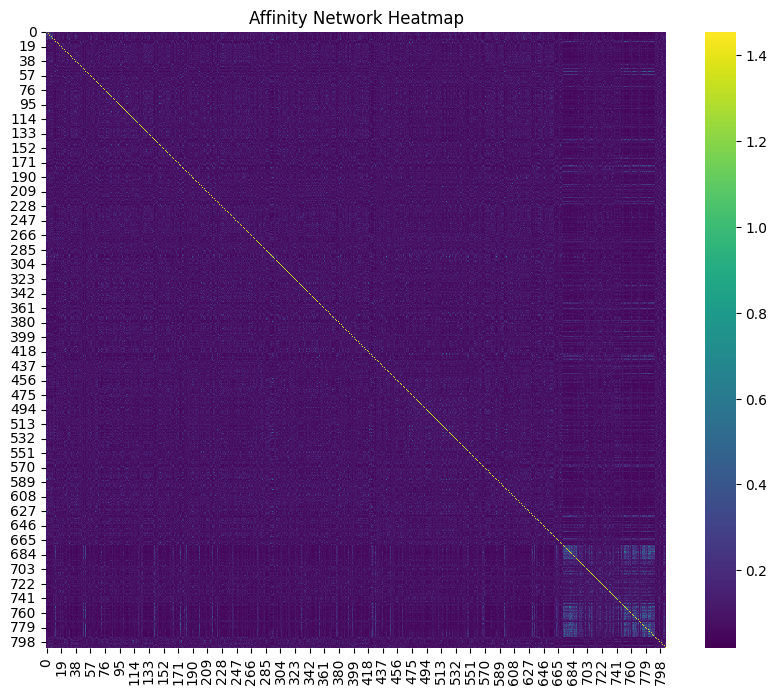

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(affinity_network, cmap='viridis')
plt.title('Affinity Network Heatmap')
plt.show()